In [15]:
from fastai.vision.all import *
from fastbook import *

In [16]:
path = untar_data(URLs.PETS)

In [17]:
# look at the data 
path.ls()

(#2) [Path('/home/jworkman/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images')]

In [18]:
(path/"images").ls()

(#7393) [Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/boxer_7.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_113.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/saint_bernard_137.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/samoyed_114.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/keeshond_31.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/Persian_103.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/samoyed_101.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/american_bulldog_216.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/British_Shorthair_130.jpg'),Path('/home/jworkman/.fastai/data/oxford-iiit-pet/images/Abyssinian_73.jpg')...]

In [19]:
fname = (path/"images").ls()[1]

In [20]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['yorkshire_terrier']

In [21]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")       

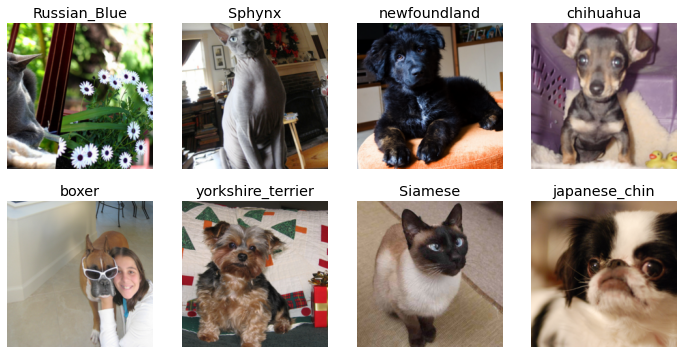

In [22]:
dls.show_batch(nrows=2,ncols=4)

In [11]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
#pets1.summary(path/'images')

In [12]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.517491,0.342868,0.118403,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.523243,0.325065,0.102842,00:54
1,0.327285,0.219083,0.075778,00:55


In [13]:
x,y = dls.one_batch()

In [14]:
y

TensorCategory([ 9,  0, 27, 22, 30, 32,  9,  5, 22,  1, 28,  0,  8,  8,  9, 35, 34, 24,  3, 10, 34, 18, 23, 18, 12, 31, 33, 18,  9, 12, 31,  6, 14, 18,  3,  7, 22, 32, 12,  0, 31, 16, 10, 20, 23,  9,  8, 26,
         1,  4, 20, 35, 22, 10, 32, 30, 24, 10, 24, 16, 33, 30, 35, 30], device='cuda:0')

In [15]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([6.7524e-04, 1.6896e-05, 6.7794e-06, 9.6951e-04, 6.8313e-03, 3.9997e-05, 1.1035e-05, 1.4341e-05, 3.0597e-06, 9.8841e-01, 1.3593e-03, 7.3078e-05, 2.7657e-06, 1.7993e-06, 3.0309e-06, 1.3845e-06,
        1.4243e-06, 9.0042e-05, 1.3156e-06, 5.3232e-06, 6.2534e-05, 3.1933e-05, 3.7005e-07, 2.0299e-06, 7.3384e-05, 2.6385e-05, 1.3300e-05, 5.3751e-05, 3.2086e-06, 4.6451e-05, 2.0382e-06, 1.0806e-04,
        2.9981e-06, 1.0311e-03, 1.0228e-05, 7.1203e-06, 5.4316e-06])

In [16]:
len(preds[0]), preds[0].sum()

(37, tensor(1.))

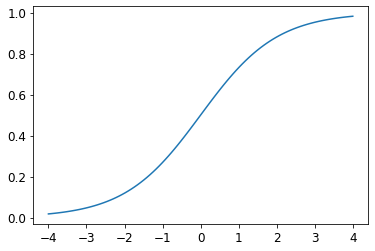

In [18]:
plot_function(torch.sigmoid, min=-4,max=4)

In [19]:
acts = torch.randn((6,2))*2
acts

tensor([[-0.9916, -2.2545],
        [ 0.1560, -1.9368],
        [-0.6164,  1.1047],
        [-2.0798, -2.1778],
        [ 1.6429, -3.7728],
        [-1.2445, -2.9512]])

In [20]:
acts.sigmoid()

tensor([[0.2706, 0.0950],
        [0.5389, 0.1260],
        [0.3506, 0.7511],
        [0.1111, 0.1018],
        [0.8379, 0.0225],
        [0.2237, 0.0497]])

In [21]:
(acts[:,0] - acts [:,1]).sigmoid()

tensor([0.7795, 0.8902, 0.1517, 0.5245, 0.9956, 0.8464])

In [22]:
def softmax(x): return exp(x) / exp(x).sum (dim = 1 ,keepdim = True)

In [29]:
interp = ClassificationInterpretation . from_learner ( learn ) 
#interp . plot_confusion_matrix ( figsize = ( 12 , 12 ), dpi = 60 )


In [37]:
interp . most_confused(min_val=3) #min val is number of errors, not list

[('Egyptian_Mau', 'Bengal', 9),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Birman', 'Ragdoll', 4),
 ('Birman', 'Siamese', 4),
 ('Ragdoll', 'Birman', 4),
 ('boxer', 'american_bulldog', 4),
 ('Ragdoll', 'Maine_Coon', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('beagle', 'basset_hound', 3),
 ('samoyed', 'great_pyrenees', 3)]

In [38]:
# Learning rate finder.
learn = cnn_learner ( dls , resnet34 , metrics = error_rate ) 
learn.fine_tune ( 1 , base_lr = 0.1 ) # added a base learning rate. default is 0.002

epoch,train_loss,valid_loss,error_rate,time
0,2.595750,3.950880,0.413396,00:44


epoch,train_loss,valid_loss,error_rate,time
0,4.665877,4.205194,0.951286,00:55


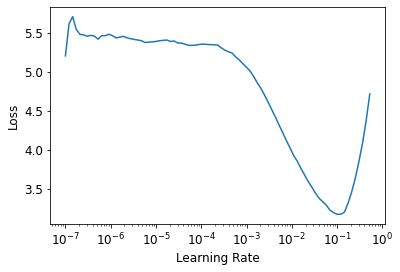

In [39]:
learn = cnn_learner ( dls , resnet34 , metrics = error_rate ) 
lr_min , lr_steep = learn . lr_find ()

In [41]:
print ( f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}" )

Minimum/10: 1.00e-02, steepest point: 4.37e-03


In [11]:
learn = cnn_learner ( dls , resnet34 , metrics = error_rate ) 
learn . fine_tune ( 2 , base_lr = 2e-3 ) # Pick the learning rate at the bottom

epoch,train_loss,valid_loss,error_rate,time
0,1.530307,0.346832,0.114344,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.492676,0.306765,0.102165,00:54
1,0.324047,0.232330,0.074425,00:55


In [43]:
learn = cnn_learner ( dls , resnet34 , metrics = error_rate ) 
learn . fine_tune ( 2 , base_lr = 3e-2 ) #

epoch,train_loss,valid_loss,error_rate,time
0,1.205050,0.954276,0.196211,00:42


epoch,train_loss,valid_loss,error_rate,time
0,2.109425,1.315734,0.368742,00:55
1,0.958027,0.468165,0.154263,00:55


In [44]:
learn = cnn_learner ( dls , resnet34 , metrics = error_rate ) 
learn . fit_one_cycle ( 3 , 3e-3 ) # fit one cycle is a way to train pre-trained models without using fine tune

epoch,train_loss,valid_loss,error_rate,time
0,1.126494,0.339082,0.097429,00:42
1,0.522699,0.256800,0.079838,00:43
2,0.333048,0.237720,0.079838,00:43


In [45]:
learn.unfreeze()

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=2.511886486900039e-05)

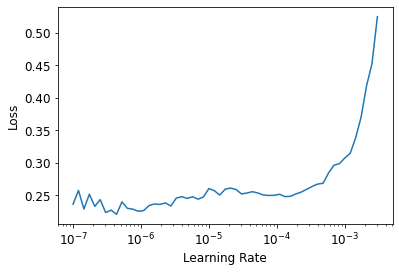

In [47]:
learn.lr_find()

In [12]:
learn . fit_one_cycle ( 6 , lr_max = 1e-10 )

epoch,train_loss,valid_loss,error_rate,time
0,0.225063,0.232901,0.074425,00:54
1,0.239179,0.232593,0.077131,00:54
2,0.247622,0.233265,0.075101,00:54
3,0.233170,0.233264,0.075778,00:55
4,0.231359,0.233972,0.073748,00:55
5,0.246308,0.232427,0.072395,00:55


In [9]:
learn = cnn_learner ( dls , resnet34 , metrics = error_rate ) 
learn . fit_one_cycle ( 3 , 3e-3 ) 
learn . unfreeze () 
learn . fit_one_cycle ( 12 , lr_max = slice ( 1e-6 , 1e-4 ))

epoch,train_loss,valid_loss,error_rate,time
0,1.151908,0.338401,0.108254,00:42
1,0.549133,0.265574,0.083897,00:42
2,0.333804,0.236577,0.083897,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.260773,0.225628,0.074425,00:54
1,0.266904,0.211685,0.072395,00:54
2,0.231992,0.208637,0.069012,00:54
3,0.217437,0.208171,0.069689,00:54
4,0.177136,0.204028,0.067659,00:53
5,0.181439,0.200754,0.072395,00:54
6,0.155811,0.196479,0.066306,00:54
7,0.142658,0.195753,0.066306,00:54
8,0.135682,0.194617,0.064953,00:54
9,0.133423,0.196134,0.061570,00:54


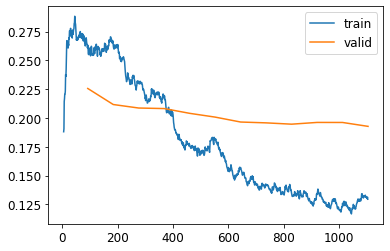

In [10]:
learn.recorder.plot_loss()

In [13]:
from fastai.callback.fp16 import *

In [23]:
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,nan,nan,0.972260,02:36
1,nan,nan,0.972260,02:34
2,nan,nan,0.972260,02:34


epoch,train_loss,valid_loss,error_rate,time
0,nan,nan,0.972260,03:58
1,nan,nan,0.972260,03:56
2,nan,nan,0.972260,03:56
3,nan,nan,0.972260,03:56
4,nan,nan,0.972260,03:56
5,nan,nan,0.972260,03:58
